In [1]:
import pandas as pd
from tqdm import tqdm
import os

In [2]:
data_train = pd.read_csv("./datasets/train_late.csv")
data_test = pd.read_csv("./datasets/merged_data/test.csv")
data_val = pd.read_csv("./datasets/val_pre.csv")
X_train, Y_train = data_train.drop('teamVictory',axis=1),data_train[['teamVictory']]
X_validate, Y_Validate = data_val.drop('teamVictory',axis=1),data_val[['teamVictory']]
X_test, Y_test = data_test.drop('teamVictory',axis=1),data_test[['teamVictory']]


In [3]:
data_train

,gameId,gameDuration,teamVictory,team_100_gold,team_200_gold,Player_1_pick,Player_1_position,Player_1_time_game,Player_1_gold,Player_1_xp,...,Player_9_dmg_taken,Player_9_time_ccing,Player_10_pick,Player_10_position,Player_10_time_game,Player_10_gold,Player_10_xp,Player_10_dmg_dealt,Player_10_dmg_taken,Player_10_time_ccing
0,398776824,1837,100,65405,58915,516,TOP,1837,11898,15994,...,23943,8,117,UTILITY,1837,7847,10195,6120,24057,28
1,1314237530,1901,100,72646,64186,420,TOP,1901,16797,18448,...,30680,5,32,UTILITY,1901,8702,12848,15059,33510,63
2,1193751212,2347,100,86919,79954,10,TOP,2347,22030,28655,...,30114,13,555,UTILITY,2347,11332,13927,12753,35429,42
3,6015759160,1939,200,63028,66116,8,TOP,1939,13486,15687,...,24220,34,111,UTILITY,1939,7768,11218,6753,19656,55
4,5938796066,1823,200,62047,65760,48,TOP,1823,14052,17113,...,32338,17,350,UTILITY,1823,11557,14320,9789,5642,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27015,3169519446,1838,100,64458,54134,516,TOP,1838,10868,15638,...,26288,39,117,UTILITY,1838,7819,8444,8254,16455,32
27016,1309616860,1837,200,55108,60997,86,TOP,1837,11586,12478,...,18311,16,43,UTILITY,1837,9020,12490,14405,11134,24
27017,6004296244,1956,100,70407,64124,150,TOP,1956,14230,18370,...,21731,12,555,UTILITY,1956,11117,9320,7015,25309,21
27018,396286960,1893,100,70023,65105,19,TOP,1893,9030,12912,...,28660,21,25,UTILITY,1893,11601,12654,23098,22031,50


In [4]:
def ChampCounterRelations(df):
    top_counter = df[['Player_1_pick','Player_1_gold','Player_6_pick','Player_6_gold']].groupby(['Player_1_pick','Player_6_pick']).mean().reset_index()
    top_counter['counter_Score'] = top_counter.apply(lambda x: x['Player_1_gold']-x['Player_6_gold'], axis=1)
    jug_counter = df[['Player_2_pick','Player_2_gold','Player_7_pick','Player_7_gold']].groupby(['Player_2_pick','Player_7_pick']).mean().reset_index()
    jug_counter['counter_Score'] = jug_counter.apply(lambda x: x['Player_2_gold']-x['Player_7_gold'], axis=1)
    mid_counter = df[['Player_3_pick','Player_3_gold','Player_8_pick','Player_8_gold']].groupby(['Player_3_pick','Player_8_pick']).mean().reset_index()
    mid_counter['counter_Score'] = mid_counter.apply(lambda x: x['Player_3_gold']-x['Player_8_gold'], axis=1)
    bot_counter = df[['Player_4_pick','Player_4_gold','Player_9_pick','Player_9_gold']].groupby(['Player_4_pick','Player_9_pick']).mean().reset_index()
    bot_counter['counter_Score'] = bot_counter.apply(lambda x: x['Player_4_gold']-x['Player_9_gold'], axis=1)
    sup_counter = df[['Player_5_pick','Player_5_gold','Player_10_pick','Player_10_gold']].groupby(['Player_5_pick','Player_10_pick']).mean().reset_index()
    sup_counter['counter_Score'] = sup_counter.apply(lambda x: x['Player_5_gold']-x['Player_10_gold'], axis=1)
    return top_counter,jug_counter,mid_counter,bot_counter,sup_counter


def MatchCounterSheet(x,top,jug,mid,bot,sup):
    return float(
        top.loc[(top['Player_1_pick']==x['Player_1_pick'])&(top['Player_6_pick']==x['Player_6_pick'])]['counter_Score']
        ),float(
        jug.loc[(jug['Player_2_pick']==x['Player_2_pick'])&(jug['Player_7_pick']==x['Player_7_pick'])]['counter_Score']    
        ),float(
        mid.loc[(mid['Player_3_pick']==x['Player_3_pick'])&(mid['Player_8_pick']==x['Player_8_pick'])]['counter_Score']    
        ),float(
        bot.loc[(bot['Player_4_pick']==x['Player_4_pick'])&(bot['Player_9_pick']==x['Player_9_pick'])]['counter_Score']    
        ),float(
        sup.loc[(sup['Player_5_pick']==x['Player_5_pick'])&(sup['Player_10_pick']==x['Player_10_pick'])]['counter_Score']    
        )

def CalulateCounterScore(df):
    top = ChampCounterRelations(df)[0]
    jug = ChampCounterRelations(df)[1]
    mid = ChampCounterRelations(df)[2]
    bot = ChampCounterRelations(df)[3]
    sup = ChampCounterRelations(df)[4]
    tmp = df.apply(MatchCounterSheet,args=(top,jug,mid,bot,sup),axis=1,result_type="expand")
    tmp.columns=['topcounter','jugcounter','midcounter','botcounter','supcounter']
    return tmp


In [5]:
tmp = CalulateCounterScore(data_train)

In [6]:
Y = tmp.join(Y_train)[['teamVictory']]

In [7]:
tmp

,topcounter,jugcounter,midcounter,botcounter,supcounter
0,-940.454545,-2226.363636,1020.941860,-1428.027027,2315.520661
1,3286.000000,-263.434783,183.176471,-1558.538961,3460.750000
2,4175.500000,-783.300000,1710.285714,-388.090909,-1436.987805
3,-2361.428571,-1622.730769,-2945.000000,1528.000000,352.333333
4,3674.000000,1871.243902,-1503.714286,-1948.722222,2197.901515
...,...,...,...,...,...
27015,-1333.250000,0.000000,0.000000,1148.619048,-276.026667
27016,0.000000,0.000000,372.777778,-74.224490,-826.687500
27017,-1008.130435,-1270.517857,-3288.000000,0.000000,0.000000
27018,-1790.000000,-1349.000000,-158.250000,437.750000,1426.880000


In [8]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [9]:
from sklearn.tree import DecisionTreeClassifier

<AxesSubplot:xlabel='supcounter', ylabel='botcounter'>

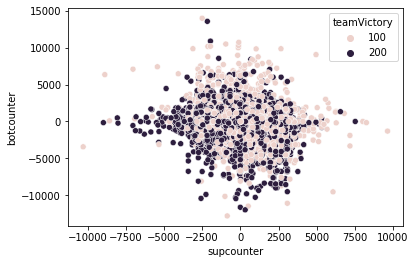

In [10]:
sns.scatterplot(tmp.join(Y_train),x='supcounter',y='botcounter',hue='teamVictory')

In [11]:
train_X, test_X, train_Y, test_Y = train_test_split(tmp, Y, test_size = 0.2, random_state = 0)

In [12]:
# #Grid Search
# param_grid = [
#         {
#             'max_depth' : range(1,20),
#             'min_samples_leaf' : range(1,20),
            
#         }
#        ]

# clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y)


# print("Best parameters set found on development set:")
# print(clf.best_params_)

              precision    recall  f1-score   support

         100       0.57      0.35      0.43      2606
         200       0.55      0.75      0.64      2798

    accuracy                           0.56      5404
   macro avg       0.56      0.55      0.53      5404
weighted avg       0.56      0.56      0.54      5404



<Figure size 432x288 with 0 Axes>

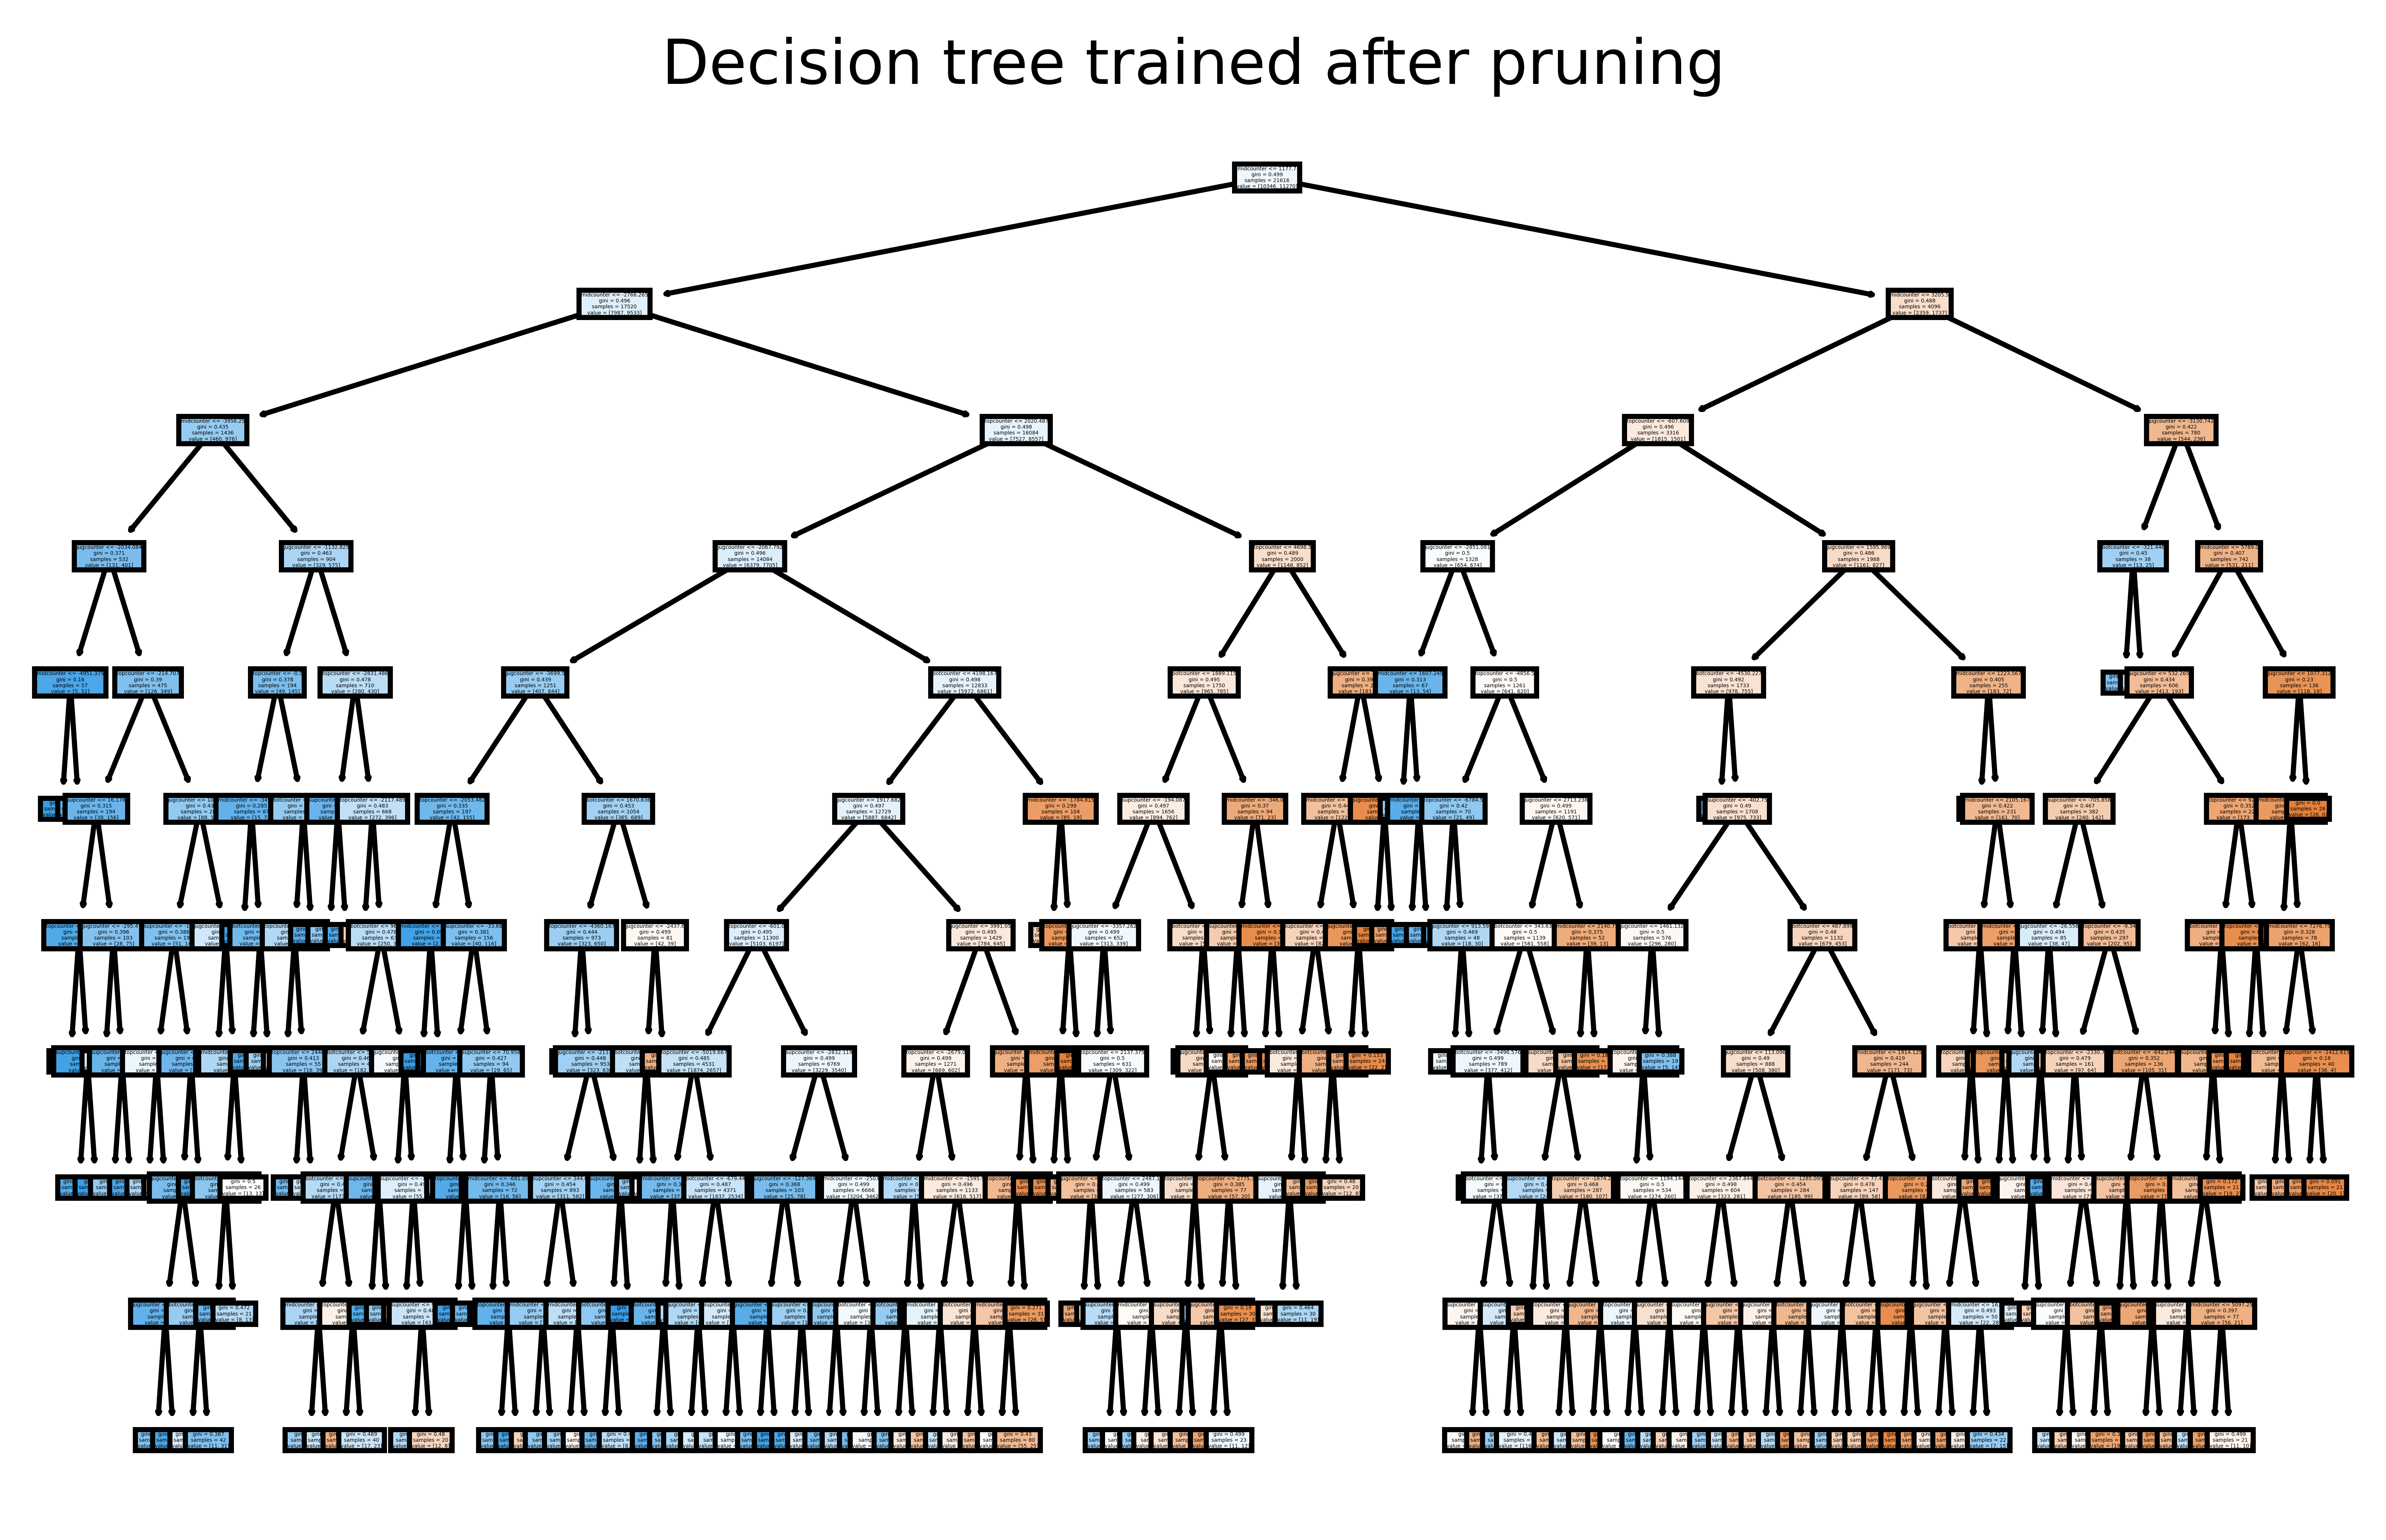

In [13]:
DCT = DecisionTreeClassifier(max_depth=10,min_samples_leaf = 19)
DCT.fit(train_X,train_Y)
y_predict = DCT.predict(test_X)

print(classification_report(y_true=test_Y,y_pred=y_predict))

#plot the decision tree with unlimited max depth
plt.figure()
plt.figure(dpi=1000,figsize=(8,5))
plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
plt.title("Decision tree trained after pruning")
plt.show()
